# <center><font color = Purple> Parameter and Hyperparamter Tuning using Keras </font></center>

#### [Part-1:Deep Learning Problem](#Part1)
#### [Part-2: Activation Function](#Part2)
#### [Part-3: Cost Function](#Part3)
#### [Part-4: Epochs](#Part4)
#### [Part-5: Gradient Estimation](#Part5)
#### [Part-6: Network Architecture](#Part6)
#### [Part-7: Network Initialization](#Part7)

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [16]:
import matplotlib.pyplot as plt

In [2]:
import keras

In [167]:
import seaborn as sb

##  Part1

#### Using CNN on the MNIST dataset to determine the numbers efficiently.

In [3]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images 
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [4]:
train_data=train_data/255
eval_data=eval_data/255

In [5]:
y_train=keras.utils.np_utils.to_categorical(train_labels,10)
y_test=keras.utils.np_utils.to_categorical(eval_labels,10)

In [6]:
train_data=train_data.reshape(train_data.shape[0],28,28,1)
eval_data=eval_data.reshape(eval_data.shape[0],28,28,1)

In [7]:
shape=(28,28,1)

In [34]:
train_data.shape

(55000, 28, 28, 1)

In [104]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
first_mod=model.fit(train_data, train_labels,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, eval_labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 46s 843us/step - loss: 2.0365 - acc: 0.4864 - val_loss: 1.4289 - val_acc: 0.7080
Epoch 2/10
55000/55000 [==============================] - 45s 814us/step - loss: 0.9381 - acc: 0.7674 - val_loss: 0.6386 - val_acc: 0.8239
Epoch 3/10
55000/55000 [==============================] - 47s 863us/step - loss: 0.5603 - acc: 0.8429 - val_loss: 0.4788 - val_acc: 0.8675
Epoch 4/10
55000/55000 [==============================] - 49s 884us/step - loss: 0.4586 - acc: 0.8670 - val_loss: 0.4109 - val_acc: 0.8825
Epoch 5/10
55000/55000 [==============================] - 47s 851us/step - loss: 0.4100 - acc: 0.8799 - val_loss: 0.3798 - val_acc: 0.8907
Epoch 6/10
55000/55000 [==============================] - 47s 855us/step - loss: 0.3812 - acc: 0.8876 - val_loss: 0.3557 - val_acc: 0.8958
Epoch 7/10
55000/55000 [==============================] - 45s 827us/step - loss: 0.3634 - acc: 0.8926 - val_loss: 0.

In [116]:
from pylab import rcParams

#### Accuracy check for our first model on the training and test set 

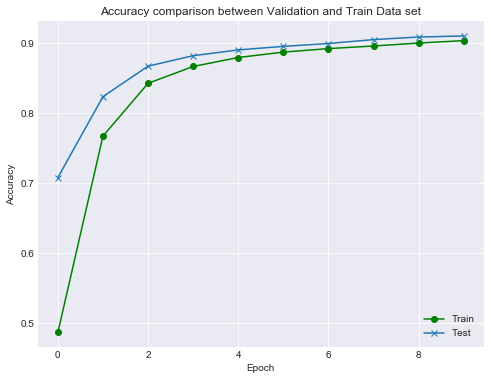

In [185]:
sb.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.plot(first_mod.history['acc'],marker='o',color="green")
plt.plot(first_mod.history['val_acc'],marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Part2

#####  Using different activation functions and checking how the models and the accuracy changes.

#### tanh - Similar to sigmoid, with values reaching from [-1,1]

In [107]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
act1=model.fit(train_data, train_labels,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, eval_labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 48s 878us/step - loss: 1.9715 - acc: 0.4281 - val_loss: 1.1620 - val_acc: 0.7485
Epoch 2/10
55000/55000 [==============================] - 50s 908us/step - loss: 0.7509 - acc: 0.8098 - val_loss: 0.5207 - val_acc: 0.8598
Epoch 3/10
55000/55000 [==============================] - 49s 897us/step - loss: 0.4720 - acc: 0.8661 - val_loss: 0.4032 - val_acc: 0.8887
Epoch 4/10
55000/55000 [==============================] - 50s 902us/step - loss: 0.3939 - acc: 0.8858 - val_loss: 0.3568 - val_acc: 0.8962
Epoch 5/10
55000/55000 [==============================] - 49s 891us/step - loss: 0.3555 - acc: 0.8957 - val_loss: 0.3276 - val_acc: 0.9041
Epoch 6/10
55000/55000 [==============================] - 47s 856us/step - loss: 0.3282 - acc: 0.9035 - val_loss: 0.3022 - val_acc: 0.9103
Epoch 7/10
55000/55000 [==============================] - 47s 850us/step - loss: 0.3062 - acc: 0.9090 - val_loss: 0.

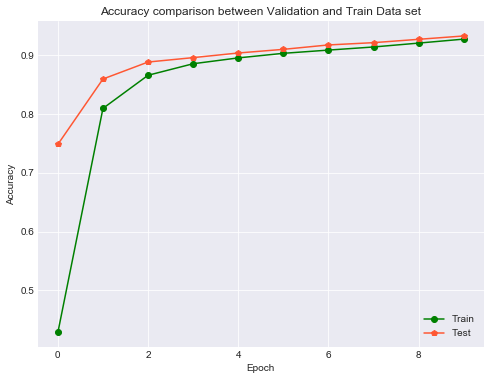

In [186]:
sb.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.plot(act1.history['acc'],color="green",marker='o')
plt.plot(act1.history['val_acc'],color="#FF5733",marker='p')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

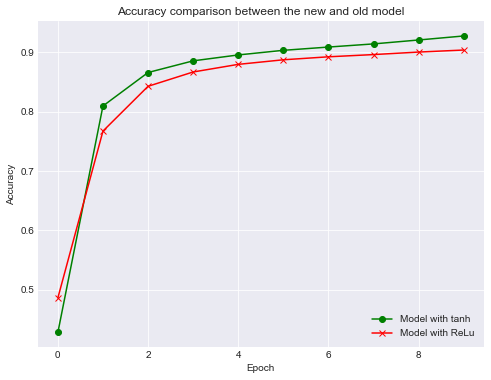

In [187]:
sb.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.plot(act1.history['acc'],color="green",marker='o')
plt.plot(first_mod.history['acc'],color='red',marker='x')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with tanh', 'Model with ReLu'], loc='lower right')
plt.show()

#### Exponential Linear Unit

In [125]:
new_act=keras.layers.LeakyReLU(alpha=0.3)

In [127]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
act2=model.fit(train_data, train_labels,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, eval_labels))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 60s 1ms/step - loss: 1.8487 - acc: 0.4892 - val_loss: 0.9457 - val_acc: 0.7962
Epoch 2/10
55000/55000 [==============================] - 59s 1ms/step - loss: 0.6353 - acc: 0.8347 - val_loss: 0.4517 - val_acc: 0.8775
Epoch 3/10
55000/55000 [==============================] - 59s 1ms/step - loss: 0.4235 - acc: 0.8783 - val_loss: 0.3686 - val_acc: 0.8931
Epoch 4/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3676 - acc: 0.8926 - val_loss: 0.3316 - val_acc: 0.9037
Epoch 5/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.3348 - acc: 0.9011 - val_loss: 0.3066 - val_acc: 0.9109
Epoch 6/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3125 - acc: 0.9073 - val_loss: 0.2880 - val_acc: 0.9157
Epoch 7/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.2911 - acc: 0.9137 - val_loss: 0.2621 - val_acc

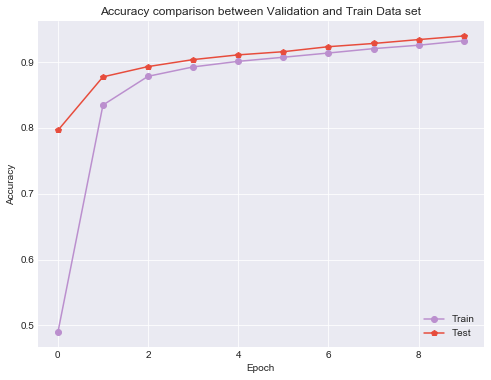

In [188]:
plt.figure(figsize=(8,6))
plt.plot(act2.history['acc'],color="#BB8FCE",marker='o')
plt.plot(act2.history['val_acc'],color="#E74C3C",marker='p')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

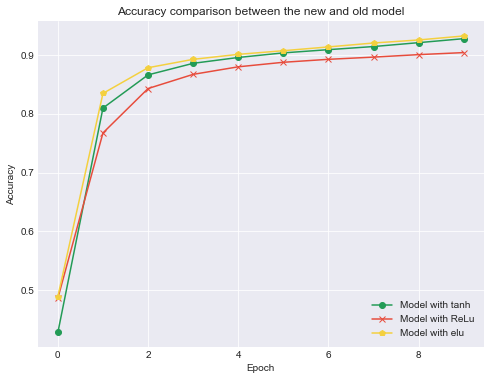

In [189]:
plt.figure(figsize=(8,6))
plt.plot(act1.history['acc'],color="#239B56",marker='o')
plt.plot(first_mod.history['acc'],color='#E74C3C',marker='x')
plt.plot(act2.history['acc'],color='#F4D03F',marker='p')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with tanh', 'Model with ReLu','Model with elu'], loc='lower right')
plt.show()

In [128]:
new_act2=keras.layers.LeakyReLU(alpha=0.7)

In [131]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
act3=model.fit(train_data, train_labels,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, eval_labels))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 58s 1ms/step - loss: 1.7277 - acc: 0.5519 - val_loss: 0.8595 - val_acc: 0.7952
Epoch 2/10
55000/55000 [==============================] - 55s 1ms/step - loss: 0.6117 - acc: 0.8339 - val_loss: 0.4659 - val_acc: 0.8721
Epoch 3/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.4315 - acc: 0.8750 - val_loss: 0.3790 - val_acc: 0.8915
Epoch 4/10
55000/55000 [==============================] - 59s 1ms/step - loss: 0.3778 - acc: 0.8891 - val_loss: 0.3433 - val_acc: 0.9016
Epoch 5/10
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3490 - acc: 0.8968 - val_loss: 0.3208 - val_acc: 0.9072
Epoch 6/10
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3265 - acc: 0.9032 - val_loss: 0.3007 - val_acc: 0.9136
Epoch 7/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3104 - acc: 0.9088 - val_loss: 0.2848 - val_acc

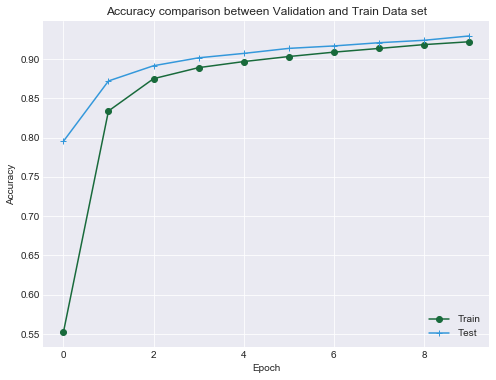

In [191]:
plt.figure(figsize=(8,6))
plt.plot(act3.history['acc'],color="#186A3B",marker="o")
plt.plot(act3.history['val_acc'],color="#3498DB",marker="+")
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

#### Checking how value of alpha affects the accuracy

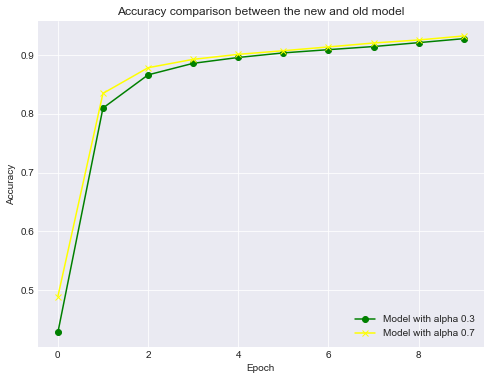

In [192]:
plt.figure(figsize=(8,6))
plt.plot(act1.history['acc'],color="green",marker='o')
plt.plot(act2.history['acc'],color='Yellow',marker='x')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with alpha 0.3', 'Model with alpha 0.7'], loc='lower right')
plt.show()

#### Checking accuracy on validation dataset- to ensure higher alpha is not leading to overfitting

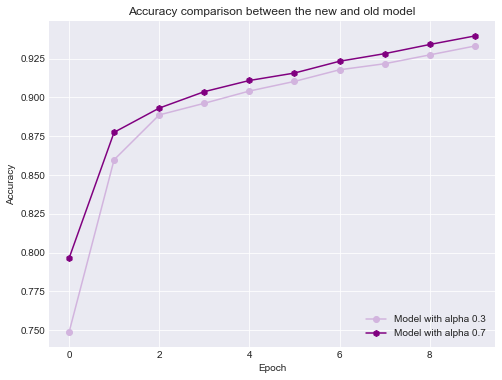

In [193]:
plt.figure(figsize=(8,6))
plt.plot(act1.history['val_acc'],color="#D2B4DE",marker='o')
plt.plot(act2.history['val_acc'],color='Purple',marker='h')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with alpha 0.3', 'Model with alpha 0.7'], loc='lower right')
plt.show()

#### Checking the accuracy we determine, that we will use the Exponential Linear Unite function with an alpha of 0.7

In [33]:
y_train.shape

(55000, 10)

## Part3

###### Changing the loss function and identifying the function that fits best with the model

#### Using the Poisson loss function

In [137]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='poisson', optimizer='Adamax', metrics=['accuracy'])
loss1=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 56s 1ms/step - loss: 0.2763 - acc: 0.5443 - val_loss: 0.1875 - val_acc: 0.8016
Epoch 2/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.1615 - acc: 0.8333 - val_loss: 0.1475 - val_acc: 0.8695
Epoch 3/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.1435 - acc: 0.8737 - val_loss: 0.1386 - val_acc: 0.8896
Epoch 4/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.1381 - acc: 0.8888 - val_loss: 0.1346 - val_acc: 0.9005
Epoch 5/10
55000/55000 [==============================] - 55s 1ms/step - loss: 0.1352 - acc: 0.8965 - val_loss: 0.1324 - val_acc: 0.9063
Epoch 6/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.1334 - acc: 0.9023 - val_loss: 0.1310 - val_acc: 0.9096
Epoch 7/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.1321 - acc: 0.9055 - val_loss: 0.1302 - val_acc

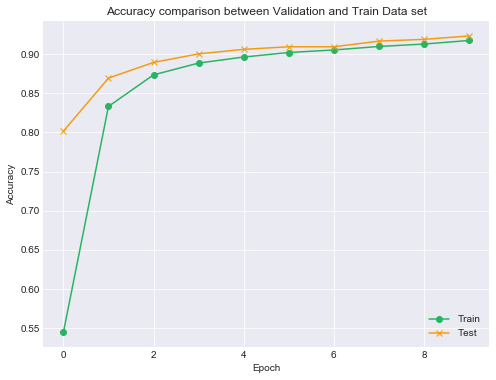

In [195]:
plt.figure(figsize=(8,6))
plt.plot(loss1.history['acc'],color="#28B463",marker='o')
plt.plot(loss1.history['val_acc'],color="#F39C12",marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

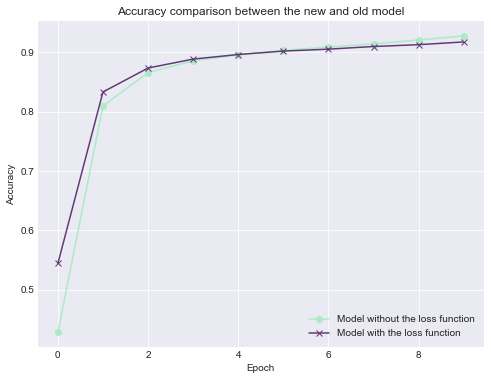

In [197]:
plt.figure(figsize=(8,6))
plt.plot(act1.history['acc'],color="#ABEBC6",marker='o')
plt.plot(loss1.history['acc'],color='#633974',marker='x')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model without the loss function', 'Model with the loss function'], loc='lower right')
plt.show()

#### Using categorical cross entropy loss function

In [138]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
loss2=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 58s 1ms/step - loss: 1.7656 - acc: 0.5402 - val_loss: 0.9126 - val_acc: 0.7902
Epoch 2/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.6411 - acc: 0.8282 - val_loss: 0.4799 - val_acc: 0.8648
Epoch 3/10
55000/55000 [==============================] - 56s 1ms/step - loss: 0.4497 - acc: 0.8709 - val_loss: 0.3972 - val_acc: 0.8850
Epoch 4/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3920 - acc: 0.8854 - val_loss: 0.3560 - val_acc: 0.8959
Epoch 5/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.3621 - acc: 0.8926 - val_loss: 0.3334 - val_acc: 0.9034
Epoch 6/10
55000/55000 [==============================] - 55s 1ms/step - loss: 0.3423 - acc: 0.8989 - val_loss: 0.3201 - val_acc: 0.9071
Epoch 7/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3280 - acc: 0.9029 - val_loss: 0.3035 - val_acc

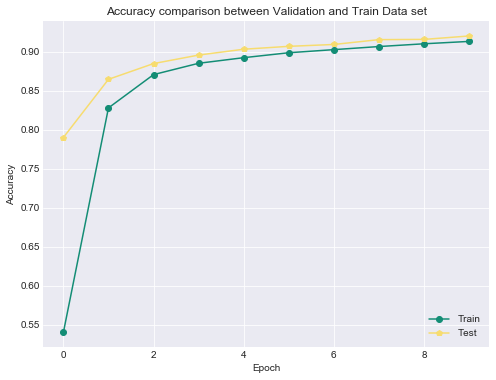

In [198]:
plt.figure(figsize=(8,6))
plt.plot(loss2.history['acc'],color="#138D75",marker='o')
plt.plot(loss2.history['val_acc'],color="#F7DC6F",marker='p')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

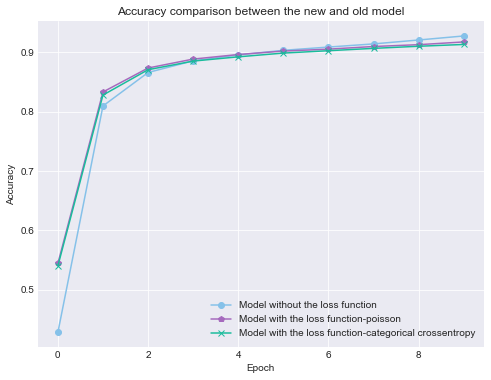

In [199]:
plt.figure(figsize=(8,6))
plt.plot(act1.history['acc'],color="#85C1E9",marker='o')
plt.plot(loss1.history['acc'],color='#A569BD',marker='p')
plt.plot(loss2.history['acc'],color='#1ABC9C',marker='x')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model without the loss function', 'Model with the loss function-poisson','Model with the loss function-categorical crossentropy'], loc='lower right')
plt.show()

## Part4

##### Changing the value of epochs

#### 15 epochs

In [146]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
epoch1=model.fit(train_data, y_train,
          batch_size=500,
          epochs=15,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/15
55000/55000 [==============================] - 59s 1ms/step - loss: 1.7640 - acc: 0.5570 - val_loss: 0.9045 - val_acc: 0.7878
Epoch 2/15
55000/55000 [==============================] - 59s 1ms/step - loss: 0.6348 - acc: 0.8310 - val_loss: 0.4709 - val_acc: 0.8687
Epoch 3/15
55000/55000 [==============================] - 57s 1ms/step - loss: 0.4388 - acc: 0.8751 - val_loss: 0.3826 - val_acc: 0.8885
Epoch 4/15
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3829 - acc: 0.8888 - val_loss: 0.3489 - val_acc: 0.9015
Epoch 5/15
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3519 - acc: 0.8971 - val_loss: 0.3260 - val_acc: 0.9063
Epoch 6/15
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3331 - acc: 0.9019 - val_loss: 0.3080 - val_acc: 0.9124
Epoch 7/15
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3135 - acc: 0.9082 - val_loss: 0.2927 - val_acc

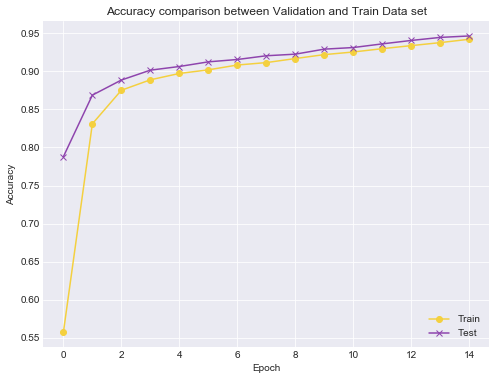

In [200]:
plt.figure(figsize=(8,6))
plt.plot(epoch1.history['acc'],color="#F4D03F",marker='o')
plt.plot(epoch1.history['val_acc'],color="#8E44AD",marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

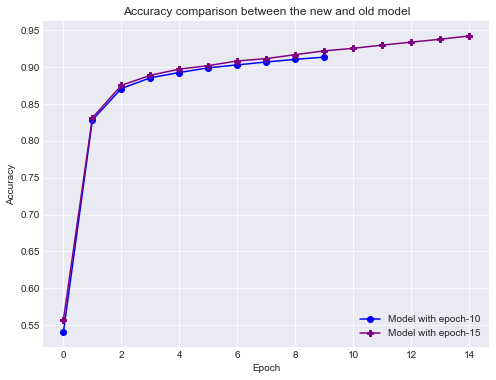

In [201]:
plt.figure(figsize=(8,6))
plt.plot(loss2.history['acc'],color='Blue',marker='o')
plt.plot(epoch1.history['acc'],color='Purple',marker='P')
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with epoch-10', 'Model with epoch-15'], loc='lower right')
plt.show()

#### Epochs - 5

In [147]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
epoch2=model.fit(train_data, y_train,
          batch_size=500,
          epochs=5,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 58s 1ms/step - loss: 1.7768 - acc: 0.5533 - val_loss: 0.9055 - val_acc: 0.8107
Epoch 2/5
55000/55000 [==============================] - 55s 1000us/step - loss: 0.6312 - acc: 0.8332 - val_loss: 0.4690 - val_acc: 0.8707
Epoch 3/5
55000/55000 [==============================] - 57s 1ms/step - loss: 0.4371 - acc: 0.8754 - val_loss: 0.3823 - val_acc: 0.8907
Epoch 4/5
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3795 - acc: 0.8897 - val_loss: 0.3459 - val_acc: 0.9008
Epoch 5/5
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3522 - acc: 0.8975 - val_loss: 0.3225 - val_acc: 0.9074


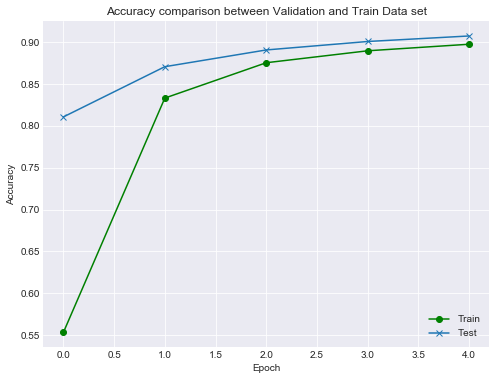

In [202]:
plt.figure(figsize=(8,6))
plt.plot(epoch2.history['acc'],color="green",marker='o')
plt.plot(epoch2.history['val_acc'],marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

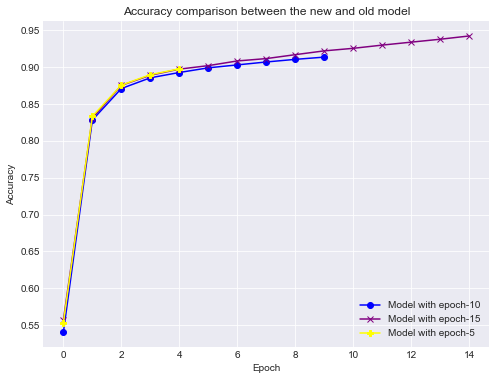

In [203]:
plt.figure(figsize=(8,6))
plt.plot(loss2.history['acc'],color='Blue',marker='o')
plt.plot(epoch1.history['acc'],color='Purple',marker='x')
plt.plot(epoch2.history['acc'],color='Yellow',marker="P")
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with epoch-10', 'Model with epoch-15','Model with epoch-5'], loc='lower right')
plt.show()

## Part5

##### Changing optimization functions

#### Stochastic Gradient Descent

In [60]:
from keras import optimizers

In [153]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
opt1=model.fit(train_data, y_train,
          batch_size=200,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 62s 1ms/step - loss: 2.3018 - acc: 0.1111 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/10
55000/55000 [==============================] - 60s 1ms/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/10
55000/55000 [==============================] - 60s 1ms/step - loss: 2.3012 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/10
55000/55000 [==============================] - 60s 1ms/step - loss: 2.3012 - acc: 0.1123 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 5/10
55000/55000 [==============================] - 60s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 6/10
55000/55000 [==============================] - 60s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3008 - val_acc: 0.1135
Epoch 7/10
55000/55000 [==============================] - 59s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3008 - val_acc

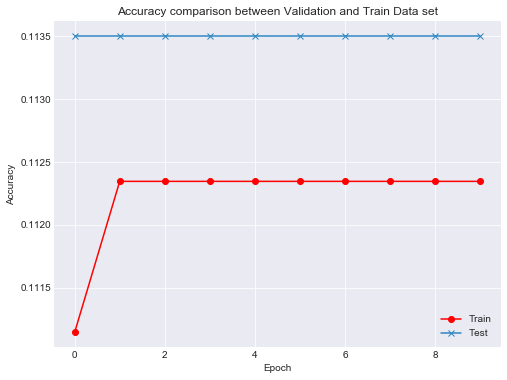

In [205]:
plt.figure(figsize=(8,6))
plt.plot(opt1.history['acc'],color="Red",marker='o')
plt.plot(opt1.history['val_acc'],color='#2E86C1',marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

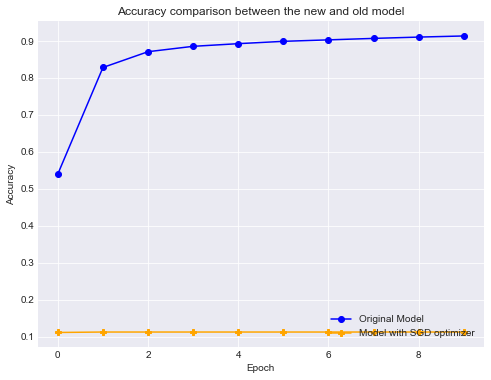

In [207]:
plt.figure(figsize=(8,6))
plt.plot(loss2.history['acc'],color='Blue',marker='o')
plt.plot(opt1.history['acc'],color='Orange',marker="P")
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Model','Model with SGD optimizer'], loc='lower right')
plt.show()

#### Adagrad

In [75]:
ada=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

In [175]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=ada, metrics=['accuracy'])
opt2=model.fit(train_data, train_labels,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, eval_labels))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 58s 1ms/step - loss: 1.5010 - acc: 0.6115 - val_loss: 0.7229 - val_acc: 0.8408
Epoch 2/10
55000/55000 [==============================] - 55s 991us/step - loss: 0.5880 - acc: 0.8475 - val_loss: 0.4761 - val_acc: 0.8706
Epoch 3/10
55000/55000 [==============================] - 54s 990us/step - loss: 0.4528 - acc: 0.8730 - val_loss: 0.4038 - val_acc: 0.8876
Epoch 4/10
55000/55000 [==============================] - 55s 1ms/step - loss: 0.4039 - acc: 0.8837 - val_loss: 0.3719 - val_acc: 0.8948
Epoch 5/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.3787 - acc: 0.8902 - val_loss: 0.3541 - val_acc: 0.8986
Epoch 6/10
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3621 - acc: 0.8936 - val_loss: 0.3391 - val_acc: 0.9024
Epoch 7/10
55000/55000 [==============================] - 55s 994us/step - loss: 0.3505 - acc: 0.8965 - val_loss: 0.3307 - v

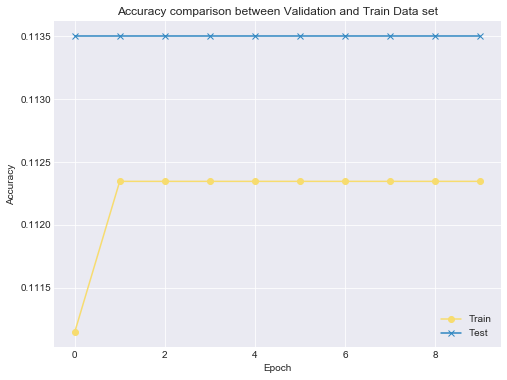

In [210]:
plt.figure(figsize=(8,6))
plt.plot(opt1.history['acc'],color="#F7DC6F",marker='o')
plt.plot(opt1.history['val_acc'],color='#2E86C1',marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

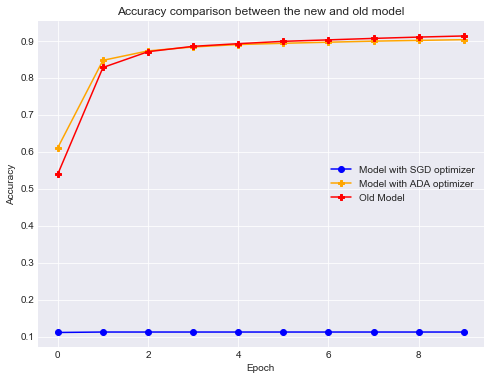

In [216]:
plt.figure(figsize=(8,6))
plt.plot(opt1.history['acc'],color='Blue',marker='o')
plt.plot(opt2.history['acc'],color='Orange',marker="P")
plt.plot(loss2.history['acc'],color='Red',marker="P")
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with SGD optimizer','Model with ADA optimizer',"Old Model"], loc='best')
plt.show()

#### Changing the parameters of the SGD optimizer

In [171]:
dg=keras.optimizers.SGD(lr=0.5, momentum=0.1, decay=0.5, nesterov=False)

In [172]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=dg, metrics=['accuracy'])
opt3=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 59s 1ms/step - loss: 2.3014 - acc: 0.1119 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/10
55000/55000 [==============================] - 55s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/10
55000/55000 [==============================] - 56s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 4/10
55000/55000 [==============================] - 56s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 5/10
55000/55000 [==============================] - 57s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 6/10
55000/55000 [==============================] - 56s 1ms/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 7/10
55000/55000 [==============================] - 54s 990us/step - loss: 2.3011 - acc: 0.1123 - val_loss: 2.3009 - val_a

#### Changing the value of Learning paramter and Decay Rate and see how it affects the accuracy

In [173]:
dg2=keras.optimizers.SGD(lr=0.1, momentum=0.5, decay=0.6, nesterov=False)

In [174]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=dg2, metrics=['accuracy'])
opt4=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 57s 1ms/step - loss: 2.3017 - acc: 0.1129 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/10
55000/55000 [==============================] - 54s 984us/step - loss: 2.3015 - acc: 0.1123 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 3/10
55000/55000 [==============================] - 55s 1ms/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 4/10
55000/55000 [==============================] - 57s 1ms/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 5/10
55000/55000 [==============================] - 57s 1ms/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 6/10
55000/55000 [==============================] - 55s 1ms/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 7/10
55000/55000 [==============================] - 56s 1ms/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3012 - val_a

## Part6

##### Changing network architecture

#### Adding another convolution layer

In [184]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation=new_act2,
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=new_act2))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer=dg2, metrics=['accuracy'])
net1=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

c:\users\isha\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 99s 2ms/step - loss: 2.3025 - acc: 0.1038 - val_loss: 2.3025 - val_acc: 0.1073
Epoch 2/10
55000/55000 [==============================] - 75s 1ms/step - loss: 2.3025 - acc: 0.1049 - val_loss: 2.3024 - val_acc: 0.1100
Epoch 3/10
55000/55000 [==============================] - 60s 1ms/step - loss: 2.3024 - acc: 0.1120 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 4/10
55000/55000 [==============================] - 63s 1ms/step - loss: 2.3024 - acc: 0.1123 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 5/10
55000/55000 [==============================] - 64s 1ms/step - loss: 2.3024 - acc: 0.1123 - val_loss: 2.3023 - val_acc: 0.1135
Epoch 6/10
55000/55000 [==============================] - 61s 1ms/step - loss: 2.3023 - acc: 0.1123 - val_loss: 2.3023 - val_acc: 0.1135
Epoch 7/10
55000/55000 [==============================] - 62s 1ms/step - loss: 2.3023 - acc: 0.1123 - val_loss: 2.3023 - val_acc

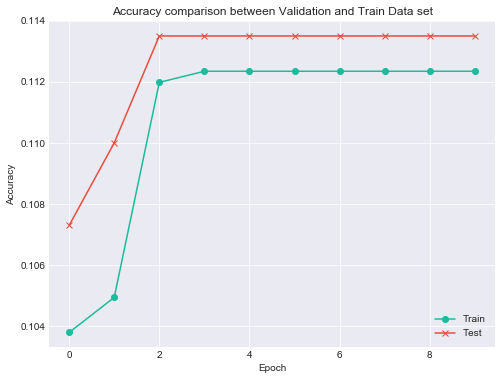

In [211]:
plt.figure(figsize=(8,6))
plt.plot(net1.history['acc'],color="#1ABC9C",marker='o')
plt.plot(net1.history['val_acc'],color='#E74C3C',marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

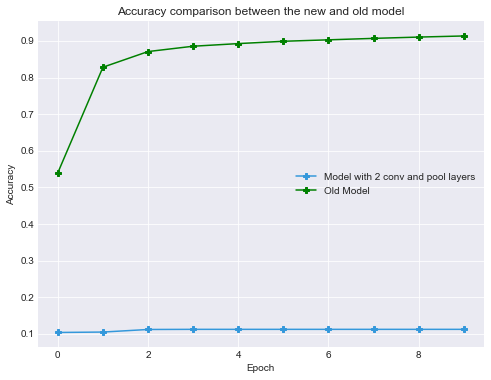

In [220]:
plt.figure(figsize=(8,6))
plt.plot(net1.history['acc'],color='#3498DB',marker="P")
plt.plot(loss2.history['acc'],color='Green',marker="P")
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model with 2 conv and pool layers','Old Model'], loc='best')
plt.show()

In [84]:
from keras import initializers

## Part7

##### Network Initialization

#### using random normal network initializer

In [190]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,kernel_initializer='random_normal', activation='relu'))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
mod_net_init1=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 50s 906us/step - loss: 1.4769 - acc: 0.5474 - val_loss: 0.5537 - val_acc: 0.8379
Epoch 2/10
55000/55000 [==============================] - 53s 956us/step - loss: 0.4571 - acc: 0.8646 - val_loss: 0.3625 - val_acc: 0.8940
Epoch 3/10
55000/55000 [==============================] - 50s 913us/step - loss: 0.3360 - acc: 0.9005 - val_loss: 0.2790 - val_acc: 0.9163
Epoch 4/10
55000/55000 [==============================] - 52s 939us/step - loss: 0.2694 - acc: 0.9187 - val_loss: 0.2257 - val_acc: 0.9323
Epoch 5/10
55000/55000 [==============================] - 46s 833us/step - loss: 0.2244 - acc: 0.9311 - val_loss: 0.1905 - val_acc: 0.9431
Epoch 6/10
55000/55000 [==============================] - 49s 899us/step - loss: 0.1887 - acc: 0.9431 - val_loss: 0.1634 - val_acc: 0.9512
Epoch 7/10
55000/55000 [==============================] - 49s 898us/step - loss: 0.1605 - acc: 0.9511 - val_loss: 0.

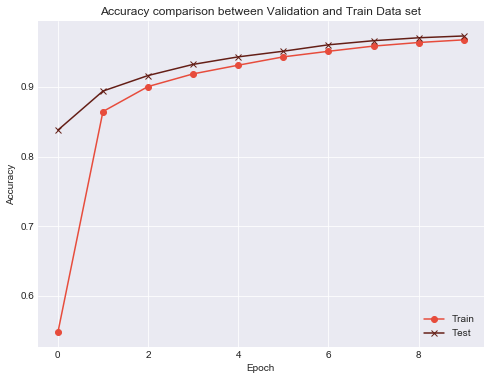

In [221]:
plt.figure(figsize=(8,6))
plt.plot(mod_net_init1.history['acc'],color="#E74C3C",marker='o')
plt.plot(mod_net_init1.history['val_acc'],color='#641E16',marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

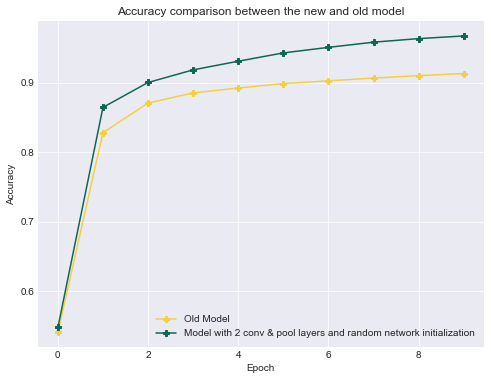

In [223]:
plt.figure(figsize=(8,6))
plt.plot(loss2.history['acc'],color='#F4D03F',marker="P")
plt.plot(mod_net_init1.history['acc'],color='#0E6655',marker="P")
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Model','Model with 2 conv & pool layers and random network initialization'], loc='best')
plt.show()

#### Using glorot-uniform network initializer

In [194]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(10, activation='softmax'))
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
mod_net_init2=model.fit(train_data, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_data=(eval_data, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 48s 876us/step - loss: 1.6018 - acc: 0.4899 - val_loss: 0.6125 - val_acc: 0.8175
Epoch 2/10
55000/55000 [==============================] - 55s 1ms/step - loss: 0.4773 - acc: 0.8567 - val_loss: 0.3663 - val_acc: 0.8903
Epoch 3/10
55000/55000 [==============================] - 54s 976us/step - loss: 0.3377 - acc: 0.8993 - val_loss: 0.2797 - val_acc: 0.9150
Epoch 4/10
55000/55000 [==============================] - 55s 995us/step - loss: 0.2679 - acc: 0.9195 - val_loss: 0.2261 - val_acc: 0.9318
Epoch 5/10
55000/55000 [==============================] - 56s 1ms/step - loss: 0.2193 - acc: 0.9336 - val_loss: 0.1819 - val_acc: 0.9428
Epoch 6/10
55000/55000 [==============================] - 50s 918us/step - loss: 0.1824 - acc: 0.9452 - val_loss: 0.1550 - val_acc: 0.9516
Epoch 7/10
55000/55000 [==============================] - 52s 948us/step - loss: 0.1528 - acc: 0.9536 - val_loss: 0.1279

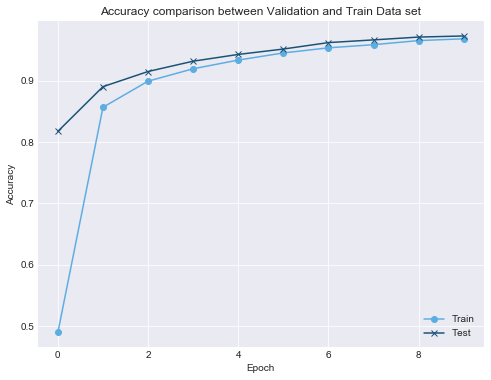

In [224]:
plt.figure(figsize=(8,6))
plt.plot(mod_net_init2.history['acc'],color="#5DADE2",marker='o')
plt.plot(mod_net_init2.history['val_acc'],color='#1A5276',marker='x')
plt.title('Accuracy comparison between Validation and Train Data set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

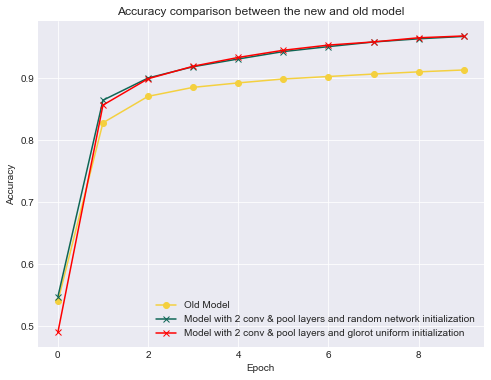

In [225]:
plt.figure(figsize=(8,6))
plt.plot(loss2.history['acc'],color='#F4D03F',marker="o")
plt.plot(mod_net_init1.history['acc'],color='#0E6655',marker="x")
plt.plot(mod_net_init2.history['acc'],color='Red',marker="x")
plt.title('Accuracy comparison between the new and old model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Old Model','Model with 2 conv & pool layers and random network initialization','Model with 2 conv & pool layers and glorot uniform initialization'], loc='best')
plt.show()

### CONCLUSION:

##### The model with 2 convolution and pooling layers, have higher accuracy compared to models with just one conv and pool layer. Also, the random normal and glorot uniform network initialization give us the same accuracy.
